In [ ]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/breast-histopathology-images.zip'

with ZipFile(file_name, 'r') as zipn:
  zipn.extractall('/content/Dataset')
  print('Done')

Done


## Libraries Import

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from glob import glob

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.preprocessing import image
import tensorflow.image as tfi
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

## Dataset Loading

In [ ]:
images_data = glob('/content/Dataset/**/*.png', recursive = True)

In [ ]:
def get_dataset(images_data):
  images = []
  labels  = []
  for img in images_data:
    images.append(img)
    labels.append(int(img[-5]))
  return images, labels   

In [ ]:
images, labels = get_dataset(images_data)

In [ ]:
print(f'Size of dataset: {len(images)}')

Size of dataset: 555048


In [ ]:
def load_image(path, size):
  return np.round(tfi.resize(img_to_array(load_img(path))/255.,(size, size)),3)

## Data Visualization

In [ ]:
def show_image(image, title='', cmap = None):
  plt.imshow(image, cmap=cmap, alpha=1)
  if title is not None:
    plt.title(title)
  plt.axis('off')

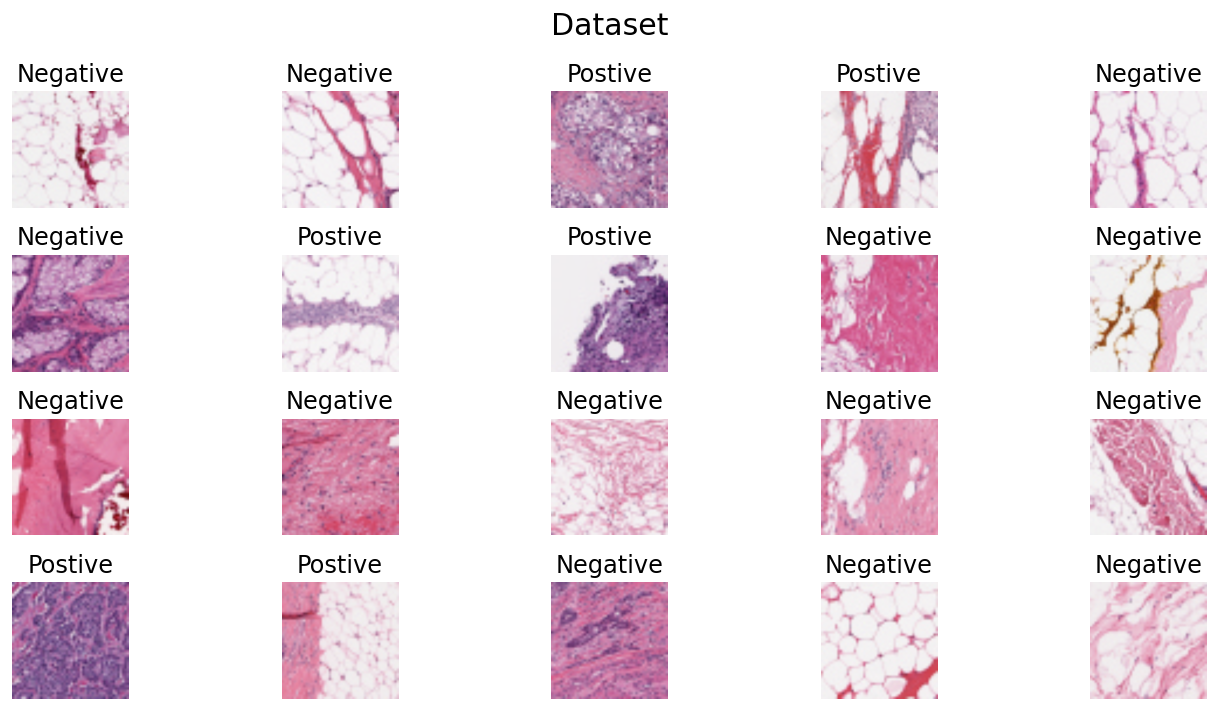

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams['figure.dpi'] = 150
for i in range(20):
  plt.subplot(4,5,i+1)
  id = np.random.randint(len(images))
  if labels[id]==1:
    title='Postive'
  elif labels[id] == 0:
    title='Negative'  
  show_image(load_image(images[id], 600), title= title)
plt.suptitle(f"Dataset", fontsize=18)
plt.tight_layout()
plt.show()

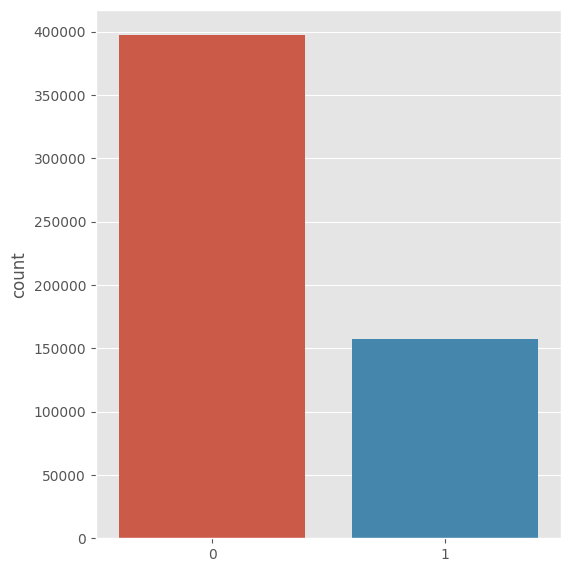

In [ ]:
plt.figure(figsize=(6,7))
plt.rcParams['figure.dpi'] = 50
sns.countplot(labels)
plt.show()

## Forming Dataset

In [ ]:
def structured_dataset(images,labels):
  negative = []
  postive = []

  for img, lab, in zip(images,labels):
    if lab == 0:
      negative.append((img, lab))
    elif lab == 1:
      postive.append((img, lab))


  complete_1 = negative[:3000] + postive[:3000]
  complete_2 = negative[3000:3050] + postive[3000:3050]
  np.random.shuffle(complete_1)
  np.random.shuffle(complete_2)
  return negative, postive, complete_1, complete_2

In [ ]:
negative, postive, complete_1, complete_2 = structured_dataset(images,labels)

In [ ]:
def generate_dataset(complete):
  data = []
  label = []
  for x in tqdm(complete):
    data.append(load_image(x[0], 100))
    label.append(np.array(x[1]))
  return np.array(data), np.array(label)  

In [ ]:
data, label = generate_dataset(complete_1)
test_data, test_label = generate_dataset(complete_2)

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

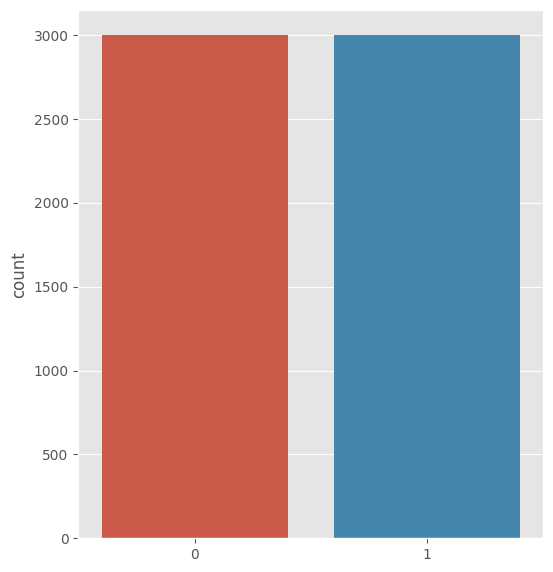

In [ ]:
plt.figure(figsize=(6,7))
plt.rcParams['figure.dpi'] = 100
sns.countplot(label)
plt.show()

In [ ]:
print(f'Dataset Size: {len(data)}')

Dataset Size: 6000


## Model Building

In [ ]:
img_width, img_height = 100, 100

In [ ]:
model = Sequential()

#convolution 
model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(192, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))

#Dense 
model.add(Flatten())

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(1, activation='sigmoid'))

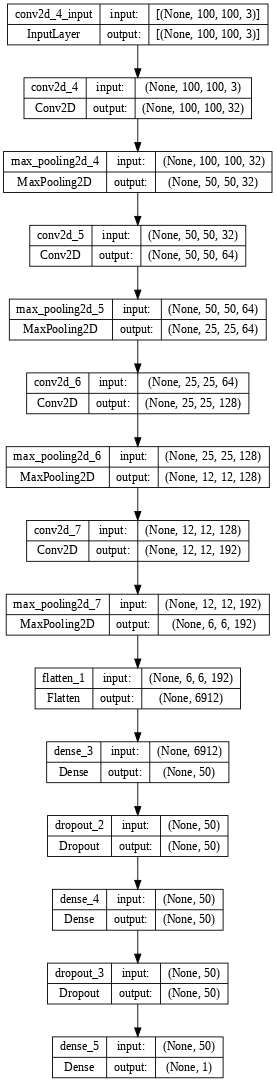

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, dpi=64)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(data, label, validation_split=0.33, epochs=20, batch_size=20)

Epoch 1/20
201/201 [==============================] - 6s 18ms/step - loss: 0.6461 - accuracy: 0.5969 - val_loss: 0.4341 - val_accuracy: 0.7865
Epoch 2/20
201/201 [==============================] - 3s 13ms/step - loss: 0.4418 - accuracy: 0.8139 - val_loss: 0.3267 - val_accuracy: 0.8607
Epoch 3/20
201/201 [==============================] - 2s 12ms/step - loss: 0.3738 - accuracy: 0.8427 - val_loss: 0.4189 - val_accuracy: 0.8127
Epoch 4/20
201/201 [==============================] - 2s 12ms/step - loss: 0.3767 - accuracy: 0.8383 - val_loss: 0.3325 - val_accuracy: 0.8541
Epoch 5/20
201/201 [==============================] - 3s 13ms/step - loss: 0.3580 - accuracy: 0.8437 - val_loss: 0.3234 - val_accuracy: 0.8521
Epoch 6/20
201/201 [==============================] - 3s 14ms/step - loss: 0.3337 - accuracy: 0.8572 - val_loss: 0.3038 - val_accuracy: 0.8703
Epoch 7/20
201/201 [==============================] - 3s 14ms/step - loss: 0.3385 - accuracy: 0.8582 - val_loss: 0.3397 - val_accuracy: 0.8541

## Model Evaluation

In [ ]:
loss, accuracy, val_loss, val_accuracy = r.history.values()

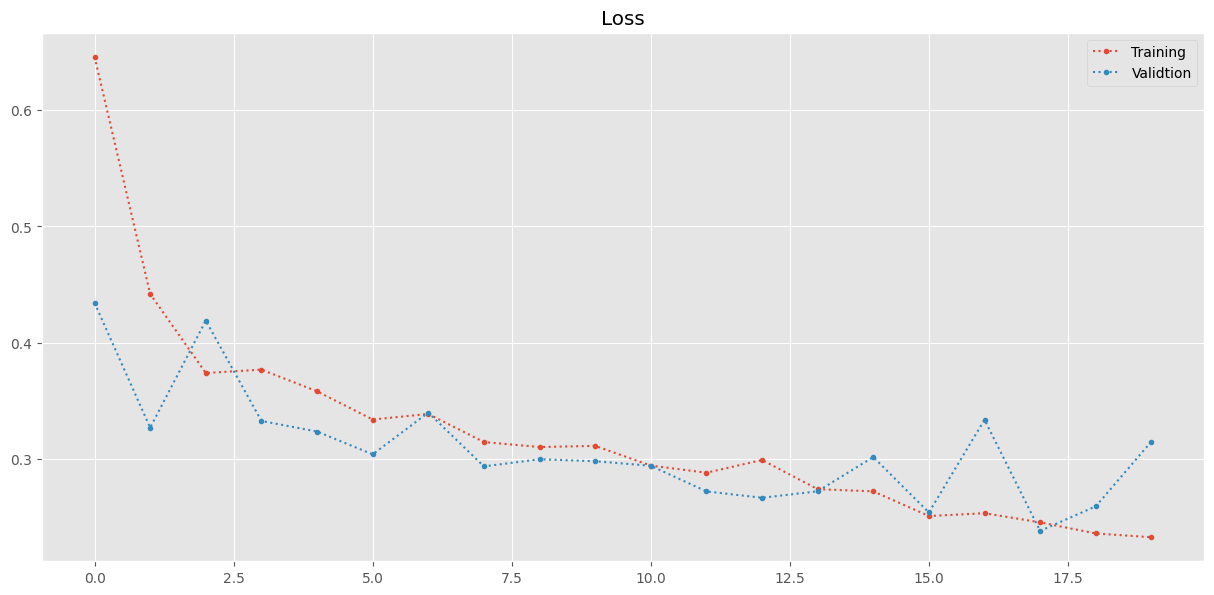

In [ ]:
plt.figure(figsize=(15,7))

plt.title("Loss")
plt.plot(loss, ".:", label="Training", linewidth=1.5)
plt.plot(val_loss, ".:", label="Validtion", linewidth=1.5)
plt.legend()
plt.show()

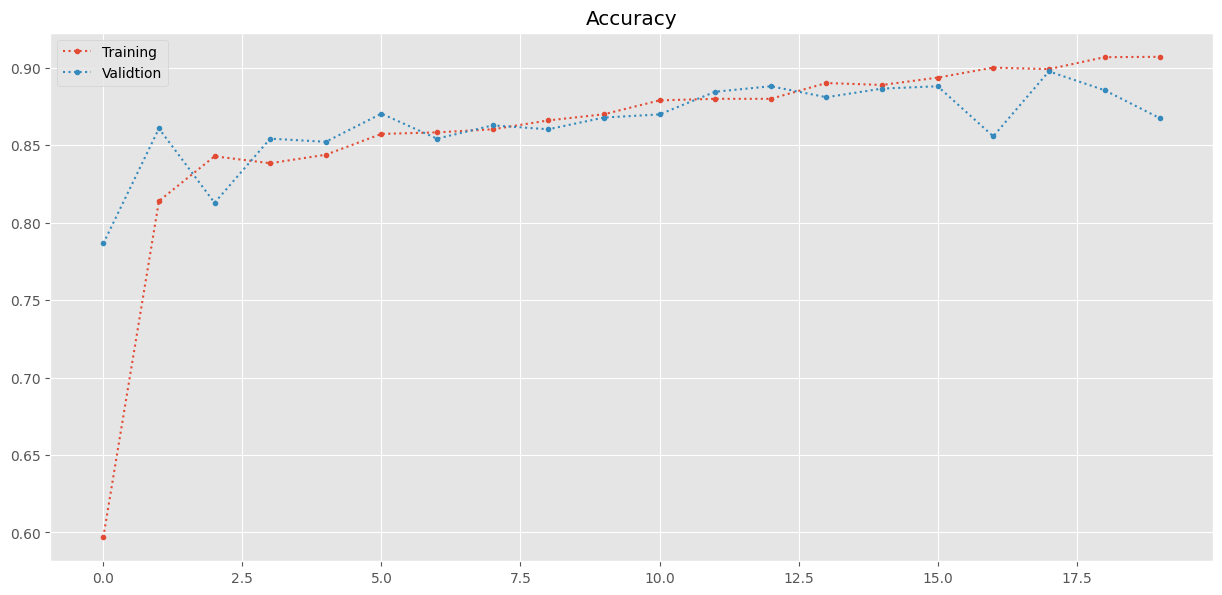

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Accuracy")
plt.plot(accuracy, ".:", label="Training", linewidth=1.5)
plt.plot(val_accuracy, ".:", label="Validtion", linewidth=1.5)
plt.legend()
plt.show()

In [ ]:
import math

In [ ]:
results = model.evaluate(test_data, test_label)
print('----------------------------------------------------------------------------------------')
print("Test Loss: {}".format(results[0]))
print("Test Accuracy: {} %".format(math.floor(results[1] * 100)))

4/4 [==============================] - 0s 32ms/step - loss: 0.0724 - accuracy: 0.9900
----------------------------------------------------------------------------------------
Test Loss: 0.07242096960544586
Test Accuracy: 99 %


## Model Testing

In [ ]:
classes = ['Negative', 'Postive']

1/1 [==============================] - 0s 31ms/step


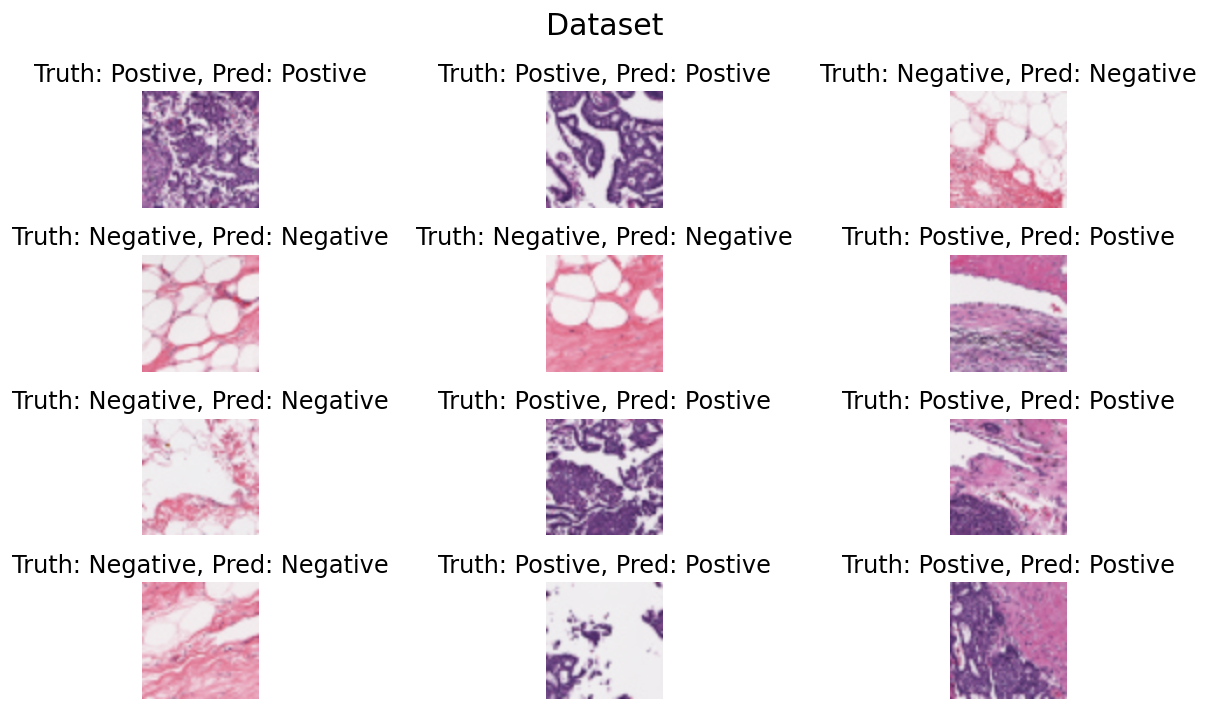

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams['figure.dpi'] = 120
for i in range(12):
  plt.subplot(4,3,i+1)
  id = np.random.randint(len(d))
  result=model.predict(np.expand_dims(d[id], 0))
  show_image(d[id], title= f'Truth: {classes[l[id]]}, Pred: {classes[np.int(np.round(result[0][0]))]}')

plt.suptitle(f"Dataset", fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
pred = []
for d in test_data:
  result=model.predict(np.expand_dims(d, 0))
  pred.append(np.int(np.round(result[0][0])))

1/1 [==============================] - 0s 20ms/step


## Confusion Matrix 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(test_label, np.array(pred))

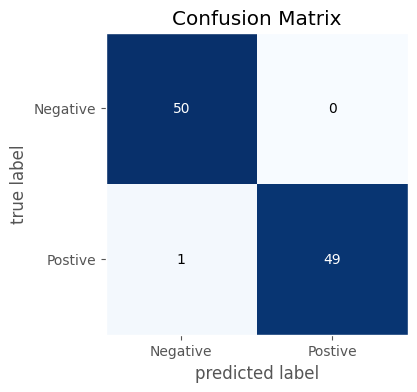

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(cnf_matrix)
ax.set_xticklabels([''] + list(classes))
ax.set_yticklabels([''] + list(classes))
plt.title('Confusion Matrix')
plt.show()

## Receiver Operating Characteristics

<Figure size 600x400 with 0 Axes>

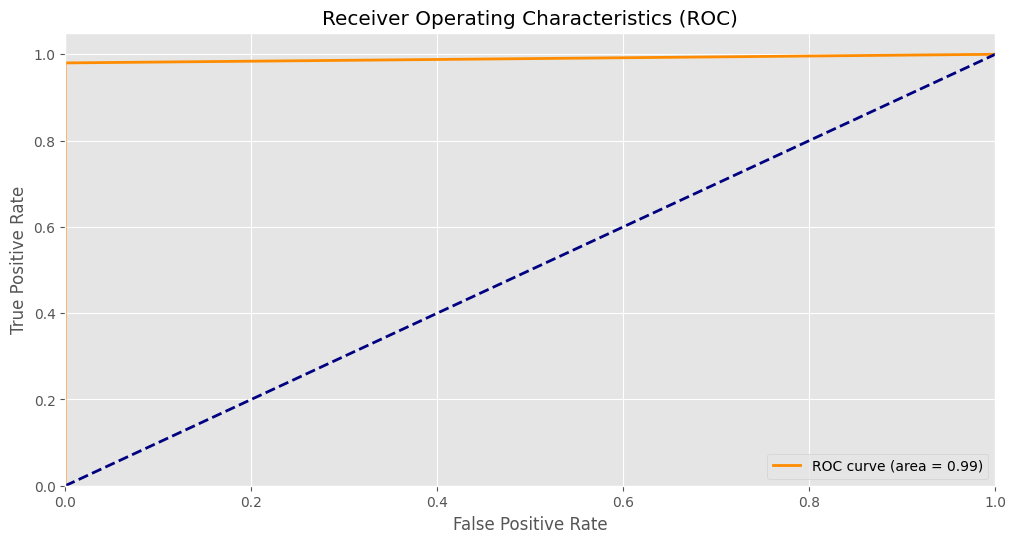

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_label, np.array(pred))
auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc="lower right")
plt.show()

## Precision vs. Recall curve

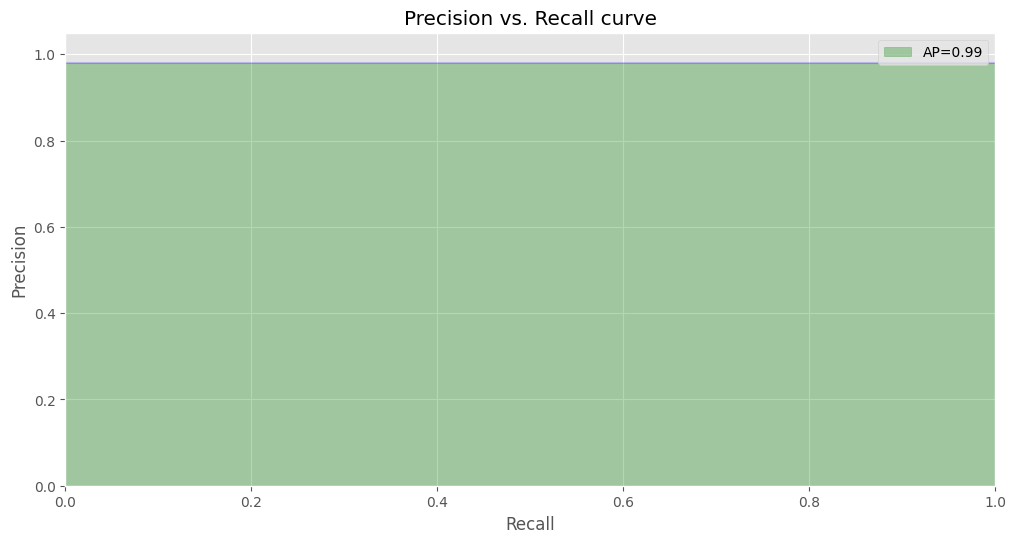

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
average_precision = average_precision_score(test_label, np.array(pred))
precision, recall, thresholds = precision_recall_curve(np.array(pred), test_label)
plt.figure(figsize=(12,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g', label='AP={0:0.2f}'.format(average_precision))
plt.title("Precision vs. Recall curve")
#plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="upper right")
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(test_label, np.array(pred), target_names= ['Negative', 'Postive'], output_dict=True)

In [ ]:
clf = pd.DataFrame(clf_report).iloc[:-1, :].T
clf['precision']['accuracy'] = np.nan
clf['recall']['accuracy'] = np.nan

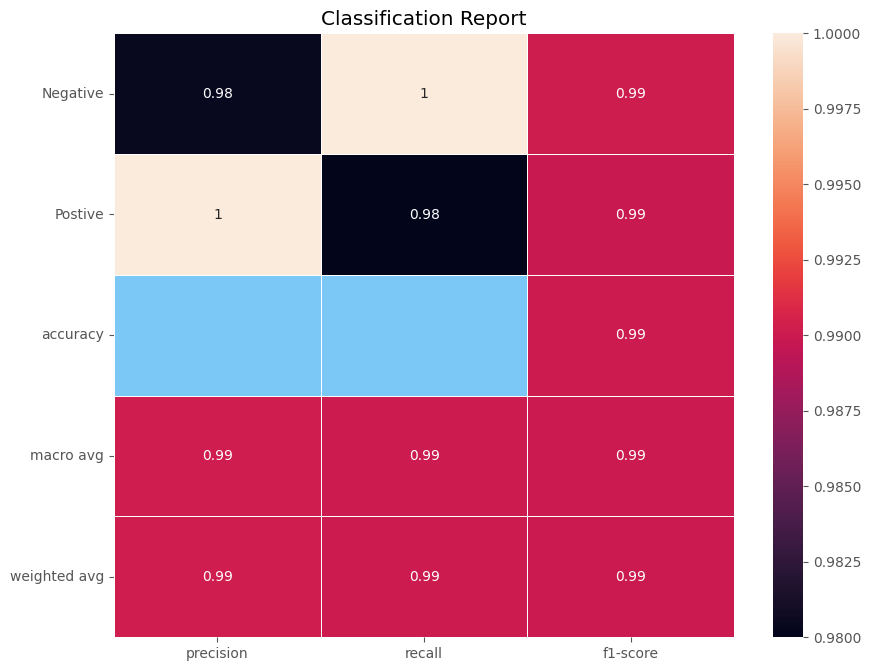

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.heatmap(clf, linewidths=.5, annot=True)
g.set_facecolor('xkcd:lightblue')
plt.yticks(rotation=-0) 
plt.title('Classification Report')
plt.show()